In [2]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
#The "hash table"
# le hash looks like this playerTotal|dealerTopCard
table = defaultdict(list)

In [4]:
#parse the CSV
#[entry["playerTotal"],entry["playerAction"],entry["dealerTopCard"],entry["result"]]
with open('res.csv', mode="r", newline="") as csvfile:
    reader = csv.reader(csvfile)

    for row in reader:
        table[f"{row[0]}|{row[2]}"].append((row[1],row[3]))
print("Done")



Done


In [5]:
#generate labels
playerTotals =[]
dealerTopCards = []
keys = list(table.keys())

for key in keys:
    temp = key.split("|")
    playerTotals.append(int(temp[0]))
    dealerTopCards.append(int(temp[1]) if temp[1] != 'a' else 11)

print(playerTotals, dealerTopCards)

[15, 20, 16, 7, 5, 17, 19, 13, 10, 5, 16, 14, 15, 18, 19, 13, 9, 17, 18, 21, 13, 16, 14, 12, 12, 17, 12, 14, 21, 7, 20, 9, 16, 18, 4, 6, 16, 10, 20, 8, 10, 19, 10, 10, 7, 17, 13, 19, 14, 15, 12, 12, 7, 17, 9, 12, 18, 15, 11, 21, 15, 20, 6, 11, 15, 9, 11, 8, 17, 13, 15, 15, 18, 16, 13, 14, 21, 15, 6, 11, 10, 20, 21, 21, 14, 13, 11, 16, 20, 18, 12, 14, 14, 17, 20, 18, 10, 6, 8, 15, 18, 6, 19, 18, 16, 11, 17, 11, 18, 8, 11, 11, 19, 8, 10, 9, 12, 20, 20, 19, 4, 9, 14, 19, 7, 16, 21, 8, 7, 9, 16, 19, 10, 13, 11, 21, 14, 17, 7, 19, 5, 21, 6, 20, 9, 8, 5, 12, 5, 9, 8, 4, 10, 7, 21, 4, 9, 6, 5, 13, 12, 17, 13, 6, 4, 4, 8, 4, 6, 8, 5, 7, 6, 7, 5, 4, 5, 5, 4, 4] [10, 6, 6, 10, 9, 8, 10, 5, 10, 10, 3, 7, 5, 10, 7, 7, 6, 2, 8, 2, 3, 8, 3, 7, 11, 10, 5, 10, 9, 11, 9, 10, 2, 4, 2, 11, 10, 4, 10, 7, 7, 2, 6, 8, 6, 4, 9, 11, 5, 2, 9, 10, 8, 6, 9, 2, 3, 4, 2, 10, 9, 2, 10, 4, 7, 3, 9, 10, 7, 10, 3, 6, 9, 4, 8, 2, 6, 8, 6, 10, 11, 11, 11, 7, 9, 2, 3, 9, 5, 2, 8, 11, 8, 11, 4, 7, 3, 2, 2, 11, 11, 7, 9, 6

In [6]:
#generate totals
#wlp is win loss precentage. A push is a win in this case as the player looses no money.
totals = {}

for key in table:
    value = table[key]
    winCount = 0
    loseCount = 0
    pushCount = 0

    for entry in value:
        if entry[1] == "push":
            pushCount += 1
        elif entry[1] == "win":
            winCount += 1
        else:
            loseCount += 1
    try:
        wlp = winCount + pushCount
        total = winCount + loseCount + pushCount
        wlp = wlp / total
    except ZeroDivisionError:
        wlp = 0.0
    wlp = round(wlp, 2)*100
    totals[key] = [winCount, loseCount, pushCount, wlp]

In [7]:
#make the first graph data
x = playerTotals
y = dealerTopCards
probs = []


d_probs = []

for entry in totals:
    probs.append(totals[entry][3])

for i in range(len(dealerTopCards)):
    d_probs.append([])
    for j in range(len(playerTotals)):
        d_probs[i].append(probs[j])

C:\Users\austi\AppData\Local\Temp\ipykernel_10624\3588288574.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y,d_probs, edgecolors="black",linewidth=0.5)


Text(0, 0.5, 'Dealer Top Card')

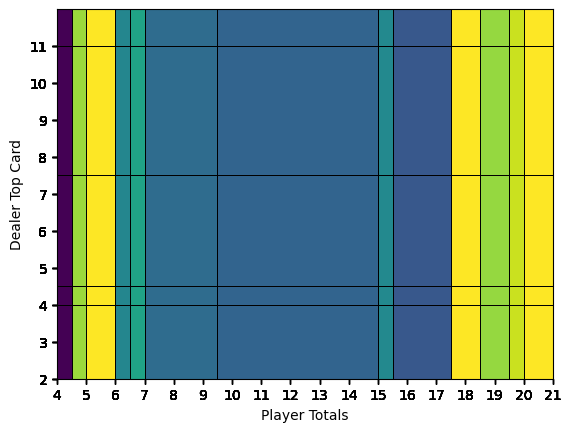

In [10]:
import numpy as np

#make the pretty colors
X, Y = np.meshgrid(x, y)
plt.pcolormesh(X, Y,d_probs, edgecolors="black",linewidth=0.5)
plt.xticks(x)
plt.yticks(y)

plt.xlabel("Player Totals")
plt.ylabel("Dealer Top Card")
